# SVM Initial Classifier

This shows a similar output as 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm

In [5]:
x_row = np.load('output/random_aggr_450.npy')
x_random = np.load('output/row_aggr_450.npy')

X = np.append(x_row[:450], x_random, axis=0).reshape(900, 49)
y = np.append(np.ones(450) * -1, np.ones(450))

(900, 49) (900,)


In [76]:
# hanna's kernel function:  φ(x,μ)=exp[ –||x–μ||^2 /σ^2 ]
from functools import partial


def hanna_gaussian_kernel(x, mu, sigma):
    return np.exp(-np.sum((x - mu) ** 2) / sigma ** 2)

    
def proxy_kernel(X1, X2, K, sigma=5):
    """(Pre)calculates Gram Matrix K"""
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))

    for i, x1 in enumerate(X1):
        x1 = x1.flatten()
        for j, x2 in enumerate(X2):
            x2 = x2.flatten()
            gram_matrix[i, j] = K(x1, x2, sigma)

    return gram_matrix


model = svm.SVC(kernel=partial(proxy_kernel, K=hanna_gaussian_kernel, sigma=15))
model.fit(X, y)

print('SVM uses', model.kernel, 'kernel.')

15
SVM uses functools.partial(<function proxy_kernel at 0x12f7ab5f0>, K=<function hanna_gaussian_kernel at 0x12f7abf80>, sigma=15) kernel.


In [80]:
y_pred = model.predict(X)
errors = [1 if pred != y[i] else 0 for i, pred in enumerate(y_pred)]

print(f"Error: {sum(errors) / len(errors):0.05f}")

15
Accuracy: 0.8988888888888888


15


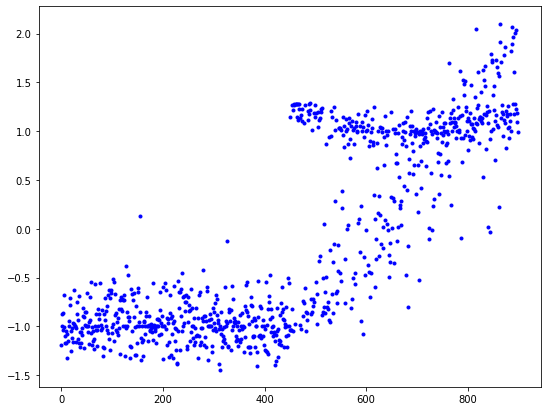

In [78]:
y_decision = model.decision_function(X)

fig, ax = plt.subplots(1, 1, figsize=(9,7))
ax.scatter(np.arange(0, len(y)), y_decision, marker='.', c="b")

plt.show()